<a href="https://colab.research.google.com/github/hemanth714444/2203A52192-lab-1-deep-learning/blob/main/2203A52182_DL_A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load the dataset
dataset_path = "/content/Load Data in kW.csv"
df = pd.read_csv(dataset_path)
# Print the actual column names
print(df.columns)

Index(['5551.82208'], dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Remove spaces

In [ ]:
# Assuming the dataset has two numerical columns
# Extract feature and target
X = df.iloc[:, 0].values.reshape(-1, 1)  # First column as feature
# The error was in this line, trying to access a non-existent second column.
# Assuming the target variable is in the first column along with the feature
y = df.iloc[:, 0].values  # First column as target

# Alternatively, if your target is in a separate file or needs to be calculated,
# you would need to load or compute it separately.

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


In [ ]:
# Initialize parameters
m = 1.0  # Initial weight
c = -1.0  # Initial bias
eta = 0.1  # Learning rate
gamma = 0.9  # Decay factor
num_epochs = 100

gm_cache = 0  # Gradient squared sum for m
gc_cache = 0  # Gradient squared sum for c
epsilon = 1e-8  # To avoid division by zero


In [ ]:
# Train using RMSprop
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        x_i = X_train[i]
        y_i = y_train[i]
        y_pred = m * x_i + c

        # Compute gradients
        gm = -2 * (y_i - y_pred) * x_i
        gc = -2 * (y_i - y_pred)

        # Update RMSprop accumulators
        gm_cache = gamma * gm_cache + (1 - gamma) * gm ** 2
        gc_cache = gamma * gc_cache + (1 - gamma) * gc ** 2

        # Update parameters
        m -= (eta / (np.sqrt(gm_cache) + epsilon)) * gm
        c -= (eta / (np.sqrt(gc_cache) + epsilon)) * gc

In [ ]:
# Predictions on training and testing data
y_train_pred = m * X_train + c
y_test_pred = m * X_test + c

In [ ]:
# Compute performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f"Training Data - MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}")

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test Data - MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}")

Training Data - MSE: 111491892.37, RMSE: 10558.97, MAE: 742.46
Test Data - MSE: 389230.90, RMSE: 623.88, MAE: 498.18


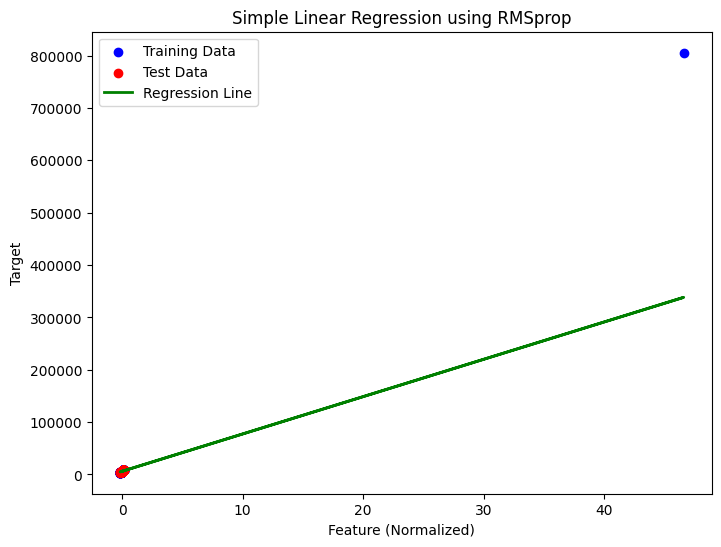

In [ ]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Feature (Normalized)')
plt.ylabel('Target')
plt.title('Simple Linear Regression using RMSprop')
plt.legend()
plt.show()